### INTRODUCTION

#### *This data is about 'customer service'. Customer service data refers to the collection and analysis of information generated through interactions between a business and its customers. This data is typically gathered through various touchpoints, including categories, dates, cities, customer inquiries, item prices, tenure buckets, ratings etc. It helps businesses monitor and improve the quality of service they provide.*

In [2]:
import pandas as pd
df=pd.read_csv(r"customer_support.csv")

In [3]:
df

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


### DATA CLEANING

In [4]:
for i in df:
    j=i.replace(' ','_')
    df=df.rename(columns={i:j.capitalize()})
    print(j)

Unique_id
channel_name
category
Sub-category
Customer_Remarks
Order_id
order_date_time
Issue_reported_at
issue_responded
Survey_response_Date
Customer_City
Product_category
Item_price
connected_handling_time
Agent_name
Supervisor
Manager
Tenure_Bucket
Agent_Shift
CSAT_Score


In [5]:
df.describe()

,Item_price,Connected_handling_time,Csat_score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [6]:
df1=df.drop(columns=['Customer_remarks','Order_id','Connected_handling_time'])

In [7]:
df1.dropna(inplace=True)

In [8]:
df1.isnull().sum()

Unique_id               0
Channel_name            0
Category                0
Sub-category            0
Order_date_time         0
Issue_reported_at       0
Issue_responded         0
Survey_response_date    0
Customer_city           0
Product_category        0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure_bucket           0
Agent_shift             0
Csat_score              0
dtype: int64

In [9]:
df1.shape

(17061, 17)

In [10]:
df1['Issue_reported_at']=pd.to_datetime(df1['Issue_reported_at'],format='%d/%m/%Y %H:%M')

In [11]:
df1.Order_date_time=pd.to_datetime(df1.Order_date_time)

C:\Users\ashiq\AppData\Local\Temp\ipykernel_42860\2054486942.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1.Order_date_time=pd.to_datetime(df1.Order_date_time)


In [12]:
df1['Issue_responded']=pd.to_datetime(df1['Issue_responded'],format='%d/%m/%Y %H:%M')

In [13]:
df1.Survey_response_date=pd.to_datetime(df1.Survey_response_date)

C:\Users\ashiq\AppData\Local\Temp\ipykernel_42860\4130462289.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1.Survey_response_date=pd.to_datetime(df1.Survey_response_date)


In [14]:
df1

,Unique_id,Channel_name,Category,Sub-category,Order_date_time,Issue_reported_at,Issue_responded,Survey_response_date,Customer_city,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure_bucket,Agent_shift,Csat_score
11,4c28acf4-2ea4-4be8-b8f1-113e676fc8b7,Inbound,Order Related,Delayed,2023-07-19 23:50:00,2023-08-02 10:44:00,2023-08-02 11:14:00,2023-08-02,NAGPUR,LifeStyle,434.0,Stanley Hogan,Harper Wong,Emily Chen,>90,Split,1
16,4cc4df74-fcd3-413a-920d-ca3ad2dd0904,Inbound,Returns,Service Centres Related,2023-05-06 21:41:00,2023-08-01 09:01:00,2023-08-01 09:03:00,2023-08-01,RANCHI,Electronics,1299.0,Amy Mendez,Sophia Sato,John Smith,0-30,Morning,5
19,6e51734e-9627-4a12-8062-877c3638627d,Inbound,Order Related,Installation/demo,2023-07-18 12:20:00,2023-08-02 20:03:00,2023-08-02 20:05:00,2023-08-02,NAGPUR,Electronics,15990.0,David Butler,Olivia Wang,Emily Chen,31-60,Evening,5
24,081f62d7-332f-4aac-91cf-e79758976725,Inbound,Returns,Reverse Pickup Enquiry,2023-07-15 14:47:00,2023-08-01 08:55:00,2023-08-01 08:57:00,2023-08-01,BETIA,Electronics,1099.0,Cynthia Mills,William Park,John Smith,31-60,Morning,5
25,c0edcb0a-cfa8-4f35-86ad-88c9f6b47290,Inbound,Order Related,Order status enquiry,2023-07-29 13:35:00,2023-08-02 11:07:00,2023-08-02 11:10:00,2023-08-02,NEW DELHI,Mobile,99999.0,Michelle Williams,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85878,712c3a65-c180-4ebb-8c0e-70f7f533b0e0,Inbound,Feedback,UnProfessional Behaviour,2023-08-20 19:50:00,2023-08-31 11:04:00,2023-08-31 11:25:00,2023-08-31,Singrauli,Books & General merchandise,25.0,Jennifer Lewis,Madison Kim,John Smith,>90,Morning,5
85881,c3d87534-42e5-41b1-8b37-632d2b3db1a8,Inbound,Order Related,Order status enquiry,2023-08-28 19:49:00,2023-08-31 12:37:00,2023-08-31 12:38:00,2023-08-31,PUNE,Electronics,599.0,Ashley Dunlap,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85886,f3e04cee-efae-42be-9c4d-8ef929261760,Inbound,Returns,Wrong,2023-08-14 23:11:00,2023-08-31 10:56:00,2023-08-31 11:02:00,2023-08-31,GUWAHATI,Home Appliences,998.0,Amanda Benjamin,Amelia Tanaka,Emily Chen,>90,Morning,4
85900,9ecbd0e0-dff3-475d-aca2-297144229e9c,Inbound,Order Related,Delayed,2023-08-14 18:43:00,2023-08-31 11:42:00,2023-08-31 11:45:00,2023-08-31,BHUPALAPALLI,Books & General merchandise,193.0,Diana White,Layla Taniguchi,Emily Chen,>90,Morning,5


##### This above data is the cleaned data.

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17061 entries, 11 to 85901
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unique_id             17061 non-null  object        
 1   Channel_name          17061 non-null  object        
 2   Category              17061 non-null  object        
 3   Sub-category          17061 non-null  object        
 4   Order_date_time       17061 non-null  datetime64[ns]
 5   Issue_reported_at     17061 non-null  datetime64[ns]
 6   Issue_responded       17061 non-null  datetime64[ns]
 7   Survey_response_date  17061 non-null  datetime64[ns]
 8   Customer_city         17061 non-null  object        
 9   Product_category      17061 non-null  object        
 10  Item_price            17061 non-null  float64       
 11  Agent_name            17061 non-null  object        
 12  Supervisor            17061 non-null  object        
 13  Manager             

In [16]:
df1.isnull().sum()

Unique_id               0
Channel_name            0
Category                0
Sub-category            0
Order_date_time         0
Issue_reported_at       0
Issue_responded         0
Survey_response_date    0
Customer_city           0
Product_category        0
Item_price              0
Agent_name              0
Supervisor              0
Manager                 0
Tenure_bucket           0
Agent_shift             0
Csat_score              0
dtype: int64

In [17]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

#### 1. Which is the product that has been returned the most?

In [18]:
df2=df1.groupby(['Product_category','Category'],as_index=False).agg(Total_count=('Category','count'))

df3=df2[df2['Category']=='Returns']
print(df3.to_string())

               Product_category Category  Total_count
4                    Affiliates  Returns          106
14  Books & General merchandise  Returns         1405
24                  Electronics  Returns         2779
34                    Furniture  Returns          161
40                     GiftCard  Returns            4
49                         Home  Returns          554
59              Home Appliences  Returns          493
68                    LifeStyle  Returns         2325
77                       Mobile  Returns          402


##### *The product category that has been returned the most is 'Electronics' with a total count of 2779 returns. This is followed by 'Lifestyle' with 2325 returns and 'Books & General merchandise' with 1405 returns.* 

C:\Users\ashiq\AppData\Local\Temp\ipykernel_42860\163339848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_category',y='Total_count', data=df3,palette='icefire')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Affiliates'),
  Text(1, 0, 'Books & General merchandise'),
  Text(2, 0, 'Electronics'),
  Text(3, 0, 'Furniture'),
  Text(4, 0, 'GiftCard'),
  Text(5, 0, 'Home'),
  Text(6, 0, 'Home Appliences'),
  Text(7, 0, 'LifeStyle'),
  Text(8, 0, 'Mobile')])

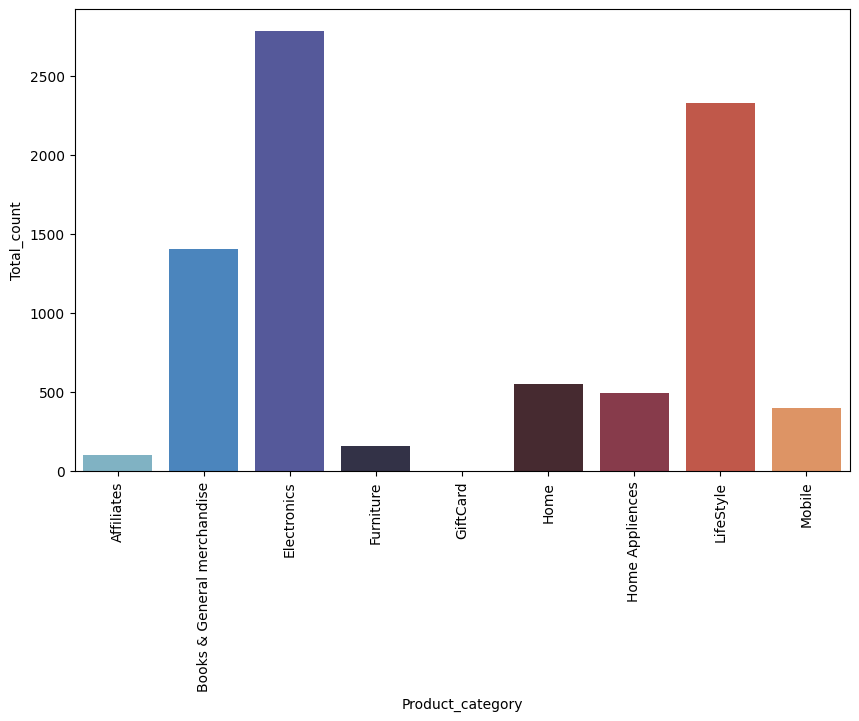

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product_category',y='Total_count', data=df3,palette='icefire')
plt.xticks(rotation=90)

##### *This clearly shows the graph of products that has been returned the most.*

#### 2. Which is the product that has been delayed the most?

In [20]:
df4=df1.groupby(['Product_category','Sub-category'],as_index=False).agg(Total_count=('Sub-category','count'))

df5=df4[df4['Sub-category']=='Delayed']
print(df5.to_string())

                Product_category Sub-category  Total_count
1                     Affiliates      Delayed           17
20   Books & General merchandise      Delayed          988
54                   Electronics      Delayed          679
90                     Furniture      Delayed          109
113                     GiftCard      Delayed            9
124                         Home      Delayed          417
154              Home Appliences      Delayed          260
186                    LifeStyle      Delayed          696
215                       Mobile      Delayed          470


##### *The product category that has been delayed the most is 'Books & General merchandise' with a total count of 988 delays. This is followed by 'LifeStyle' with 696 delays and 'Electronics' with 679 delays.*

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Affiliates'),
  Text(1, 0, 'Books & General merchandise'),
  Text(2, 0, 'Electronics'),
  Text(3, 0, 'Furniture'),
  Text(4, 0, 'GiftCard'),
  Text(5, 0, 'Home'),
  Text(6, 0, 'Home Appliences'),
  Text(7, 0, 'LifeStyle'),
  Text(8, 0, 'Mobile')])

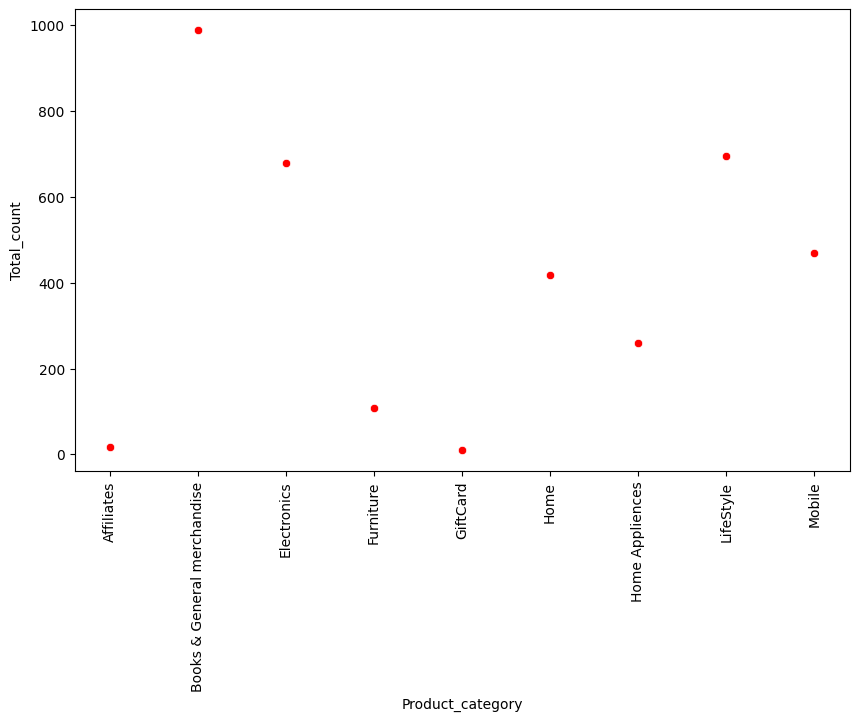

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Product_category',y='Total_count', data=df5,color='red')
plt.xticks(rotation=90)

##### *This clearly shows the graph of products that has been delayed the most.*

#### 3. Top 10 dates where the most issues reported.


In [22]:
df1['date_only'] = df1['Issue_reported_at'].dt.date
# print(df1[['Issue_reported_at', 'date_only']])
df6=df1.groupby(['date_only'],as_index=False)['date_only'].agg(['count'])
Top_10_dates=df6.sort_values(by='count',ascending=False).head(10)
print(Top_10_dates)


     date_only  count
14  2023-08-11   2627
17  2023-08-14    877
15  2023-08-12    721
11  2023-08-08    681
16  2023-08-13    655
21  2023-08-18    643
20  2023-08-17    626
19  2023-08-16    593
10  2023-08-07    560
4   2023-08-01    516


##### *The top 10 dates where the most issues were reported are shown above. The highest number of issues reported was on 'August 11, 2023', with 2627 issues.*

C:\Users\ashiq\AppData\Local\Temp\ipykernel_42860\3718374461.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date_only',y='count',data=Top_10_dates,palette='BuGn_r')


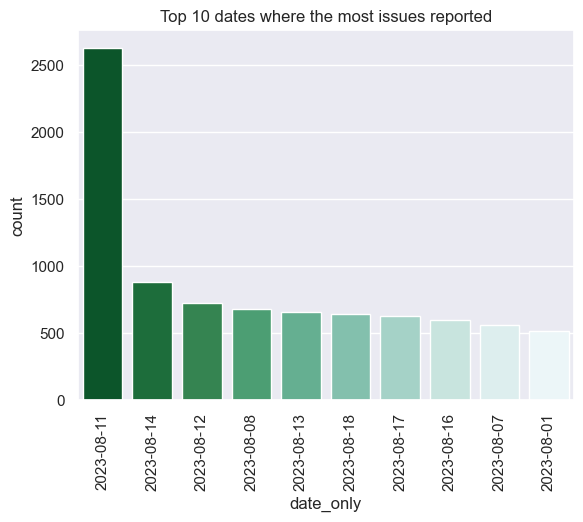

In [23]:
sns.set(color_codes=True)
sns.barplot(x='date_only',y='count',data=Top_10_dates,palette='BuGn_r')
plt.title('Top 10 dates where the most issues reported')
plt.xticks(rotation=90)
plt.show()

##### *This is the graph of the top 10 dates where the most issues reported.*

#### 4. Top 5 dates where the most survey responded.

In [24]:
df7=df1.groupby(['Survey_response_date'])['Survey_response_date'].agg(['count'])
Top_5_dates=df7.sort_values(by='count',ascending=False).head(5)
print(Top_5_dates)

                      count
Survey_response_date       
2023-08-11             2641
2023-08-14             1010
2023-08-12              845
2023-08-08              835
2023-08-18              788


##### *The top 5 dates where the most surveys were responded are shown above. The highest number of surveys responded was on 'August 11, 2023', with 2627 issues.*

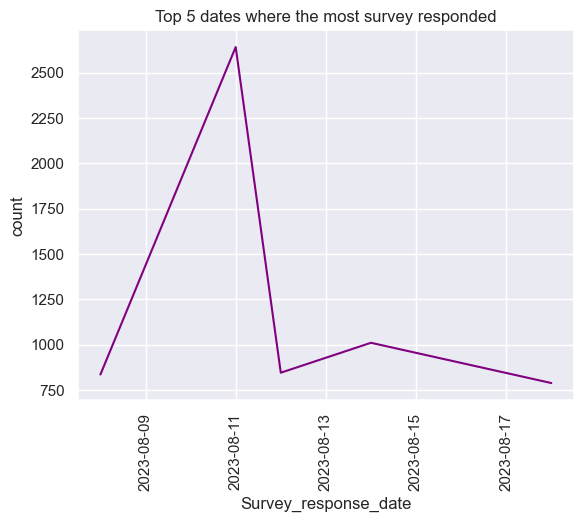

In [25]:
sns.lineplot(x='Survey_response_date',y='count',data=Top_5_dates,color='purple')
plt.title('Top 5 dates where the most survey responded')
plt.xticks(rotation=90)
plt.show()

##### *The above graph represents the top 5 dates where most surveys responded.*

#### 5. How many agents working under Manager John Smith?

In [26]:
df8=df1.groupby(['Manager'],as_index=False).agg(Total_count=('Agent_name','count'))
df9=df8[df8['Manager']=='John Smith']
df9

,Manager,Total_count
2,John Smith,5345


##### *There are 5345 number of agents working under manager John Smith.*

#### 6. The average price of items that customers have ordered.

In [27]:
df1['Item_price'].mean()

np.float64(5637.704648027666)

##### *The average item price that customers have ordered is 5637.704648027666.*

#### 7. Top 30 agents who handled the most calls? 

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count tickets handled by each agent
calls_handled = df1['Agent_name'].value_counts().reset_index().head(30)
calls_handled.columns = ['Agent_name', 'count']
calls_handled

,Agent_name,count
0,Wendy Taylor,103
1,Rebecca Walker,66
2,Kayla Wilson,61
3,Andrea Conley,53
4,Jamie Smith,53
5,Kristin Beasley,51
6,Scott Sutton,50
7,Matthew White PhD,48
8,Timothy Huff,48
9,Brianna Brown PhD,48


##### *The above output shows the top 30 agents who handled the most calls.*

C:\Users\ashiq\AppData\Local\Temp\ipykernel_42860\373465760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Agent_name', y='count', data=calls_handled, palette='Blues_d')


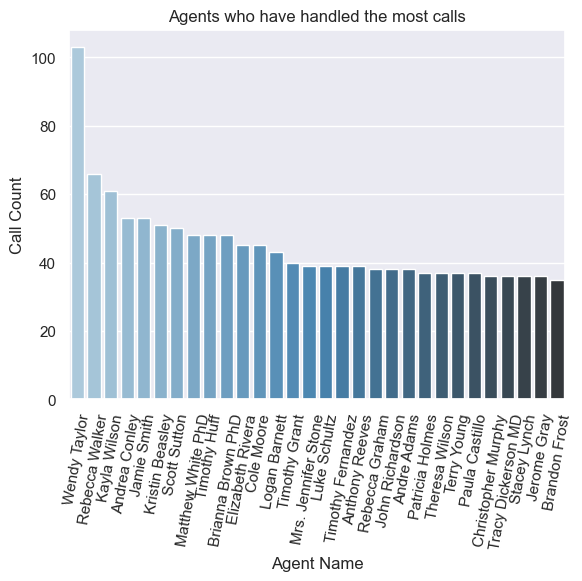

In [29]:
# Plotting the barplot
sns.barplot(x='Agent_name', y='count', data=calls_handled, palette='Blues_d')
plt.title('Agents who have handled the most calls')
plt.xlabel('Agent Name')
plt.ylabel('Call Count')
plt.xticks(rotation=80)  # Rotate x-axis labels for better readability
plt.show()

##### *This is the graph which plots the above output.*

#### 8.  Identify the top 5 cities where the most inquiries came?

In [30]:
top_5_cities = df1['Customer_city'].value_counts().reset_index().head(5)
top_5_cities

,Customer_city,count
0,HYDERABAD,722
1,NEW DELHI,686
2,PUNE,435
3,MUMBAI,405
4,BANGALORE,352


##### *The top 5 cities where the most inquiries came from are 'Hyderabad', 'New Delhi', 'Pune', 'Mumbai' and 'Bangalore'.*

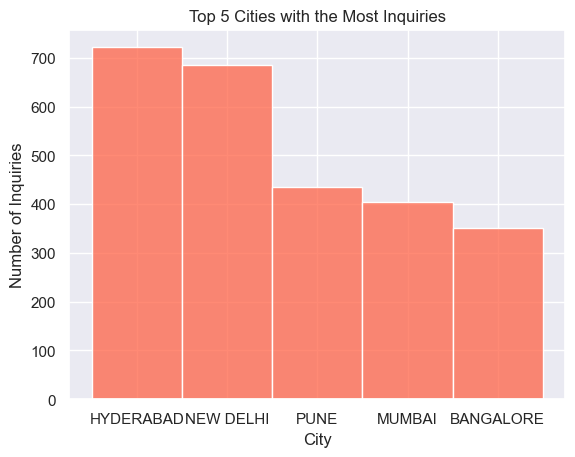

In [31]:
top_5_cities.columns = ['Customer_city', 'count']
sns.histplot(top_5_cities, x='Customer_city', weights='count', bins=5, color='tomato')
plt.xlabel('City')
plt.ylabel('Number of Inquiries')
plt.title('Top 5 Cities with the Most Inquiries')
plt.show()

##### *This histplot shows the top 5 cities where most inquiries came from.*

#### 9. What is the overall Csat_score? Are there any significant differences in satisfaction scores between different product categories?

In [32]:
# Calculate overall customer satisfaction
overall_satisfaction = df1['Csat_score'].mean()
print("Overall Customer Satisfaction:", overall_satisfaction)

# Analyze differences by product category
satisfaction_by_category = df1.groupby('Product_category')['Csat_score'].mean()
print("Satisfaction by Product Category:\n", satisfaction_by_category)

Overall Customer Satisfaction: 3.9665904694918233
Satisfaction by Product Category:
 Product_category
Affiliates                     4.239264
Books & General merchandise    4.027526
Electronics                    4.027010
Furniture                      3.619658
GiftCard                       3.555556
Home                           3.949962
Home Appliences                3.704475
LifeStyle                      4.108121
Mobile                         3.635788
Name: Csat_score, dtype: float64


##### *The overall Csat_score is 3.9665904694918233. The significant differences in Csat scores between different product categories are shown above.*

#### 10. Compare list of agents with split and evening shifts.

In [33]:
df11=df1[['Agent_name','Agent_shift']]
df11
agents_with_split_shifts = df11[df11["Agent_shift"] == "Split"]
agents_with_evening_shifts=df11[df11["Agent_shift"] == "Evening"]
common_agents = agents_with_split_shifts.index.intersection(agents_with_evening_shifts.index)
all_agents = agents_with_split_shifts.index.union(agents_with_evening_shifts.index)
split_only_agents = agents_with_split_shifts.index.difference(agents_with_evening_shifts.index)
evening_only_agents = agents_with_evening_shifts.index.difference(agents_with_split_shifts.index)
print(common_agents)
print(all_agents)
print(split_only_agents)
print(evening_only_agents)

Index([], dtype='int64')
Index([   11,    19,    27,    37,    50,    69,    92,   109,   119,   129,
       ...
       85721, 85729, 85736, 85748, 85760, 85774, 85775, 85786, 85806, 85881],
      dtype='int64', length=7139)
Index([   11,   232,   439,   497,   606,   674,   789,   793,   814,   864,
       ...
       84543, 84568, 84855, 84905, 84906, 85176, 85371, 85461, 85492, 85579],
      dtype='int64', length=686)
Index([   19,    27,    37,    50,    69,    92,   109,   119,   129,   133,
       ...
       85721, 85729, 85736, 85748, 85760, 85774, 85775, 85786, 85806, 85881],
      dtype='int64', length=6453)


##### *The intersection, union and difference between split and evening shifts are shown above.*

#### 11. Variance of item prices greater than 10,000.

In [34]:
df12=df1[['Item_price']]
item_price_gt_10000=df12[df12["Item_price"]>10000]
# print(item_price_gt_10000)
variance=item_price_gt_10000["Item_price"].var()
variance


np.float64(393514894.6140687)

##### *The variance of item prices greater than 10,000 is '393514894.6140687'.*

#### 12. plot the distribution of CSAT score.

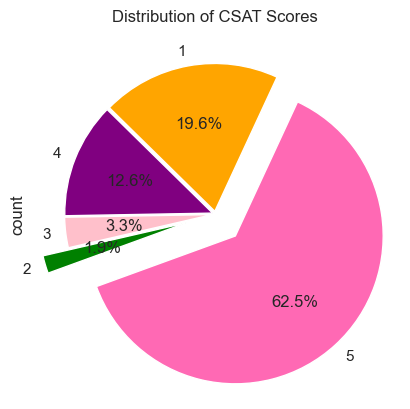

In [35]:
df13=df1[["Csat_score"]]
score_counts = df13["Csat_score"].value_counts()
explode=[0.2,0.02,0.02,0.02,0.2]
colors=['hotpink','orange','purple','pink','green']
score_counts.plot.pie(explode=explode,colors=colors,autopct='%1.1f%%', startangle=200)
plt.title("Distribution of CSAT Scores")
plt.show()

##### *Above pie chart represents the distribution of Csat score.*

#### 13. which type of shift do agents prefer the most?

C:\Users\ashiq\AppData\Local\Temp\ipykernel_42860\1784140915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Agent_shift", data=df14, palette='pastel')


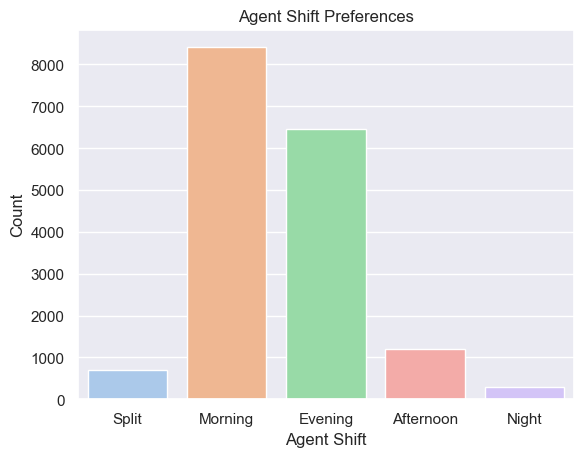

In [36]:
df14=df1[['Agent_shift']]
sns.countplot(x="Agent_shift", data=df14, palette='pastel')


plt.title("Agent Shift Preferences")
plt.xlabel("Agent Shift")
plt.ylabel("Count")
plt.show()

##### *The type of shift agents prefer the most is 'Morning' shift.*

#### 14. Top 50 supervisors who have most agents working under them.

In [37]:
df15=df1[['Supervisor','Agent_name']]
supervisor_counts = df.groupby('Supervisor').size().sort_values(ascending=False)
supervisor_counts
top_50_supervisors = supervisor_counts.head(50)
print(top_50_supervisors)

Supervisor
Carter Park         4273
Elijah Yamaguchi    3855
Zoe Yamamoto        3551
Nathan Patel        3549
Noah Patel          3434
Ava Wong            3373
Emma Park           3290
Mia Patel           3279
Evelyn Kimura       2974
Aiden Patel         2892
Madison Kim         2772
William Park        2692
Scarlett Chen       2676
Emily Yamashita     2581
Jackson Park        2571
Brayden Wong        2540
Logan Lee           2466
Olivia Wang         2233
Abigail Suzuki      2222
Olivia Suzuki       2193
Mason Gupta         2109
Lily Chen           1869
Ethan Tan           1831
Wyatt Kim           1727
Austin Johnson      1723
Sophia Sato         1671
Landon Tanaka       1635
Ethan Nakamura      1584
Jacob Sato          1501
Amelia Tanaka       1364
Alexander Tanaka    1320
Lucas Singh         1285
Dylan Kim           1197
Charlotte Suzuki    1172
Harper Wong         1119
Isabella Wong       1081
Layla Taniguchi      924
Mia Yamamoto         625
Oliver Nguyen        417
Sophia Chen   

##### *The above data show the top 50 supervisors who have most agents working under them.*

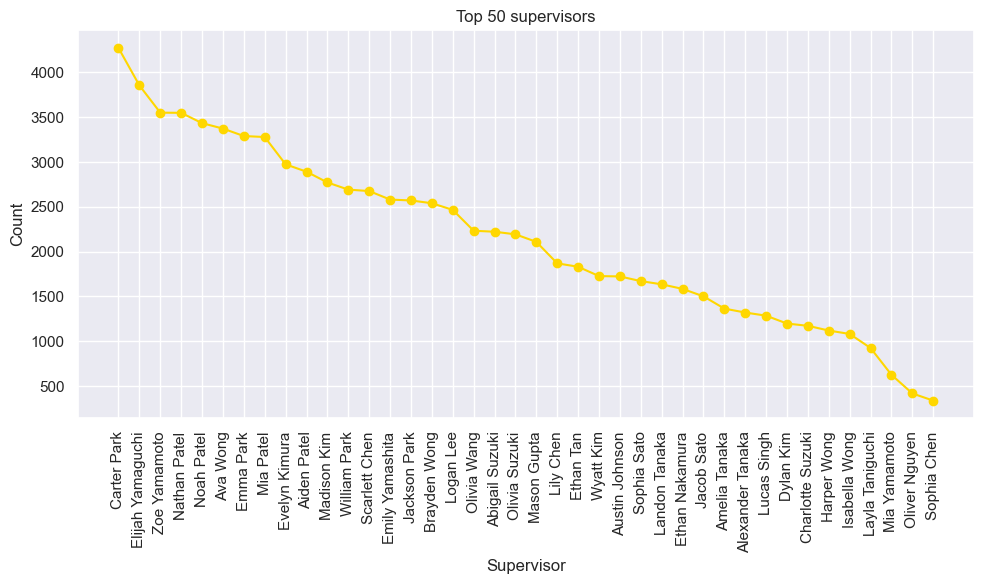

In [38]:
# CREATE THE SALES GRAPH
plt.figure(figsize=(10, 6))
plt.plot(top_50_supervisors.index, top_50_supervisors.values, marker='o', linestyle='-',color='gold')
plt.title('Top 50 supervisors')
plt.xlabel('Supervisor')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### *This is the plot that shows the top 50 supervisors who have most agents working under them.*

#### 15. Analize the Tenure Bucket and visualise it using a bar graph.

In [39]:
df16=df1[['Tenure_bucket']]
tenure_counts = df16['Tenure_bucket'].value_counts()
total_employees = len(df16)
tenure_percentages = (tenure_counts / total_employees) * 100
most_common_bucket = tenure_counts.idxmax()

# Print results
print("Total employees:", total_employees)
print("Tenure distribution:")
print(tenure_counts)
print("Tenure percentages:")
print(tenure_percentages)
print("Most common bucket:", most_common_bucket)

Total employees: 17061
Tenure distribution:
Tenure_bucket
>90                6119
On Job Training    4084
31-60              2825
0-30               2502
61-90              1531
Name: count, dtype: int64
Tenure percentages:
Tenure_bucket
>90                35.865424
On Job Training    23.937636
31-60              16.558232
0-30               14.665025
61-90               8.973683
Name: count, dtype: float64
Most common bucket: >90


##### *The above output shows that the total agents working are 17061 with count of each tenure buckets '>90, On Job Training, 31-60, 0-30 and 61-90'. The percentage of each tenure bucket are also shown above.*

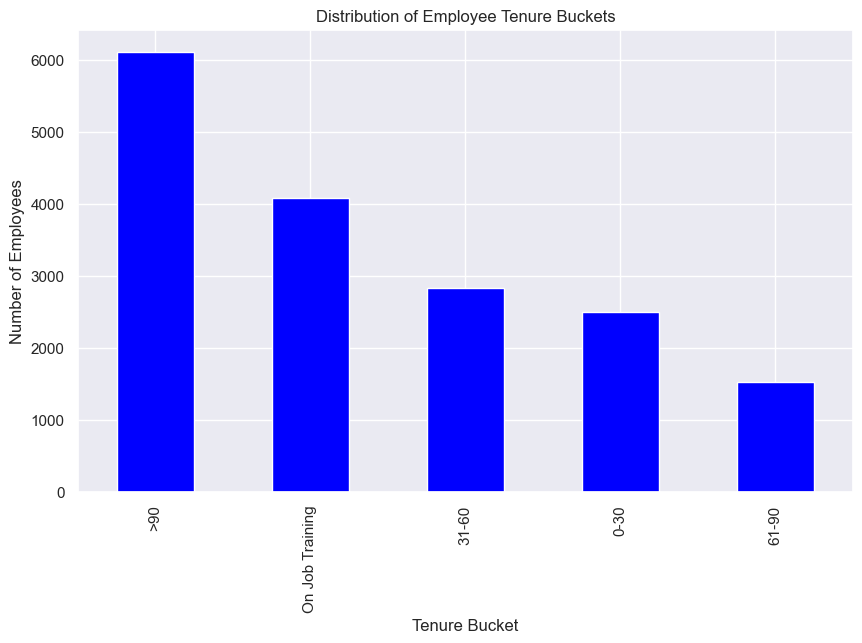

In [40]:
plt.figure(figsize=(10, 6))
tenure_counts.plot(kind='bar',color='blue')
plt.title('Distribution of Employee Tenure Buckets')
plt.xlabel('Tenure Bucket')
plt.ylabel('Number of Employees')
plt.show()

##### *This is the graphical representation of Tenure bucket.*

### CONCLUSION

#### *The project on customer service data provided a comprehensive understanding of customer interactions and service performance. Through the systematic analysis of key metrics such as inquiry volume, response times, resolution efficiency, and customer satisfaction, we gained critical insights into how effectively customer needs are being met. The data analysis revealed important trends, including peak inquiry times, the most common types of customer concerns, and areas where service performance either exceeded or fell short of expectations.*

##### The customer service data analysis offers comprehensive insights into various aspects of customer interactions, product performance, and workforce distribution. Electronics (2,779 returns) and LifeStyle (2,325 returns) emerge as the most returned product categories, suggesting potential quality or customer expectation mismatches. On the other hand, Books & General Merchandise leads the list of delayed products with 988 delays, followed by Electronics (679 delays). The top dates with the highest reported issues, such as August 11, 2023 (2,627 issues), coincide with dates where the most survey responses were also recorded, highlighting potential surges in customer activity or operational bottlenecks on those dates.

##### In terms of geographical impact, Hyderabad leads the list of cities with the most inquiries (722), followed by New Delhi (686) and Pune (435), indicating areas that may need enhanced customer service resources. Wendy Taylor is the top-performing agent, having handled 103 calls, while John Smith supervises the most agents (5,345). Supervisors like Carter Park and Elijah Yamaguchi, with teams of 4,273 and 3,855 agents respectively, manage significant portions of the workforce.

##### The overall customer satisfaction score (CSAT) stands at 3.97, with Affiliates (4.24) and LifeStyle (4.11) products receiving the highest satisfaction. In contrast, categories such as Furniture (3.62) and GiftCard (3.56) indicate room for improvement in customer satisfaction. Analyzing workforce tenure reveals that most employees (35.87%) have been in the company for more than 90 days, with a significant number still undergoing On-Job Training (23.94%).

##### Additionally, the average price of items ordered by customers is approximately 5,638, and the variance in prices for higher-end items is extremely large (393,514,894.61), suggesting a wide range of product offerings. Collectively, this data points to specific product categories needing improvement, peak times for customer engagement, and cities that might benefit from focused customer service enhancements. It also reflects the diverse tenure within the workforce, which may impact customer service quality, especially during training periods.